# Employee Performance and Retention Analysis  

## Introduction  
As a product manager leading a team of engineers, one of my key challenges is evaluating employee performance in a fair and objective manner. I aim to leverage key metrics to assess performance and eliminate subjective bias from the process. Another significant challenge is identifying employees who may be at risk of leaving the team or company. Being able to predict this risk based on specific metrics would allow me to take proactive measures to improve retention.  

## Objective  
Ensuring my team’s productivity and keeping employees motivated is a crucial responsibility. To support this, I am working on a capstone project using a Kaggle dataset focused on employee productivity and other key data points. My goal is to apply various modeling techniques to answer the following questions:  

### Key Research Questions  
- **Employee Resignation Prediction:** Use classification techniques to identify key factors influencing an employee’s decision to resign.  
- **Salary Prediction:** Determine the ideal monthly salary for an employee based on performance scores and other factors such as job title and years of experience.  

## Expected Outcomes  
Through this project, I hope to gain insights that can be applied in my workplace, using similar modeling techniques to enhance decision-making and achieve my goals as a manager.  


## Data Source
https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data?resource=download

The dataset provides data on employee demographics and performance. The key columns in this dataset are
- Years_At_Company: The number of years the employee has been working for the company.
- Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
- Gender: Gender of the employee (Male, Female, Other).
- Department: The department in which the employee works (e.g., Sales, HR, IT).
- Performance_Score: Employee's performance rating (1 to 5 scale).
- Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
- Work_Hours_Per_Week: Number of hours worked per week.
- Overtime_Hours: Total overtime hours worked in the last year.
- Remote_Work_Frequency - Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%)
- Team_Size: Number of people in the employee's team.
- Training_Hours - Number of hours of training for the employee
- Promotions: Number of promotions received during their tenure.
- Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
- Resigned: Boolean value indicating if the employee has resigned.
<br/>
<br/>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
import plotly.express as px

from sklearn import set_config
set_config(display="diagram")
import time

warnings.simplefilter(action='ignore')

In [144]:
# Load the dataset
employee_df = pd.read_csv("data/employee.csv")

In [145]:
employee_df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [146]:
employee_df.describe(include='all')

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000
unique,NaN,9,3,NaN,7,3650,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Marketing,Male,NaN,Specialist,2020-09-29 08:03:05.556036,NaN,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,11216,48031,NaN,14507,46,NaN,50041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89990
mean,50000.500000,NaN,NaN,41.029410,NaN,NaN,4.476070,NaN,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088,NaN
std,28867.657797,NaN,NaN,11.244121,NaN,NaN,2.869336,NaN,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719,NaN
min,1.000000,NaN,NaN,22.000000,NaN,NaN,0.000000,NaN,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
25%,25000.750000,NaN,NaN,31.000000,NaN,NaN,2.000000,NaN,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000,NaN
50%,50000.500000,NaN,NaN,41.000000,NaN,NaN,4.000000,NaN,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000,NaN
75%,75000.250000,NaN,NaN,51.000000,NaN,NaN,7.000000,NaN,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000,NaN


In [147]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [148]:
# Data Shape and Info
print("Data Shape:", employee_df.shape)

# Missing Value Analysis
print("\nMissing Values:")
print(employee_df.isnull().sum())

Data Shape: (100000, 20)

Missing Values:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


<br/>
<br/>

## Cleaning and sanitizing the dataset
Clean the employee data by handling inconsistencies and outliers.

Reasoning: Standardize categorical columns and handle outliers in numerical columns. Convert 'Hire_Date' to datetime objects.
<br/>

In [149]:
# Standardize categorical columns
for col in ['Department', 'Job_Title', 'Education_Level', 'Gender']:
    employee_df[col] = employee_df[col].str.strip().str.title()

# Outlier handling for numerical columns using IQR
numerical_cols = ['Age', 'Years_At_Company', 'Monthly_Salary', 'Work_Hours_Per_Week',
                  'Performance_Score', 'Employee_Satisfaction_Score']
for col in numerical_cols:
    Q1 = employee_df[col].quantile(0.25)
    Q3 = employee_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    employee_df[col] = employee_df[col].clip(lower=lower_bound, upper=upper_bound)

# Convert 'Hire_Date' to datetime objects
employee_df['Hire_Date'] = pd.to_datetime(employee_df['Hire_Date'])

display(employee_df.head())

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,It,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


**Data analysis**

Analyze the relationship between employee performance and retention.

Reasoning: Calculate the average tenure for employees who resigned versus those who did not, analyze performance ratings by department, investigate the correlation between performance scores and retention, and explore potential factors influencing retention.

In [150]:
# 1. Average tenure for employees who resigned vs. those who did not
average_tenure_resigned = employee_df[employee_df['Resigned'] == True]['Years_At_Company'].mean()
average_tenure_not_resigned = employee_df[employee_df['Resigned'] == False]['Years_At_Company'].mean()
print(f"Average tenure for employees who resigned: {average_tenure_resigned}")
print(f"Average tenure for employees who did not resign: {average_tenure_not_resigned}")

# 2. Analyze performance ratings by department
average_performance_by_department = employee_df.groupby('Department')['Performance_Score'].mean()
print("\nAverage performance score by department:\n", average_performance_by_department)

# 3. Correlation between performance scores and retention
correlation = employee_df['Performance_Score'].corr(employee_df['Resigned'].astype(int))  # Convert boolean to int for correlation
print(f"\nCorrelation between Performance Score and Resigned: {correlation}")

# 4. Potential factors influencing retention
retention_factors = employee_df.groupby(['Department', 'Resigned'])[['Monthly_Salary', 'Employee_Satisfaction_Score', 'Years_At_Company']].mean()
print("\nAverage salary, satisfaction, and tenure by department and retention status:\n", retention_factors)

Average tenure for employees who resigned: 4.4828171828171826
Average tenure for employees who did not resign: 4.475319479942216

Average performance score by department:
 Department
Customer Support    2.997121
Engineering         3.020263
Finance             2.981161
Hr                  2.997354
It                  3.000000
Legal               2.981741
Marketing           2.980653
Operations          3.006797
Sales               2.994336
Name: Performance_Score, dtype: float64

Correlation between Performance Score and Resigned: -0.002714393871526843

Average salary, satisfaction, and tenure by department and retention status:
                            Monthly_Salary  Employee_Satisfaction_Score  \
Department       Resigned                                                
Customer Support False        6409.418048                     2.968131   
                 True         6353.369763                     2.967250   
Engineering      False        6423.502374                     3.00

**Data Visualization**

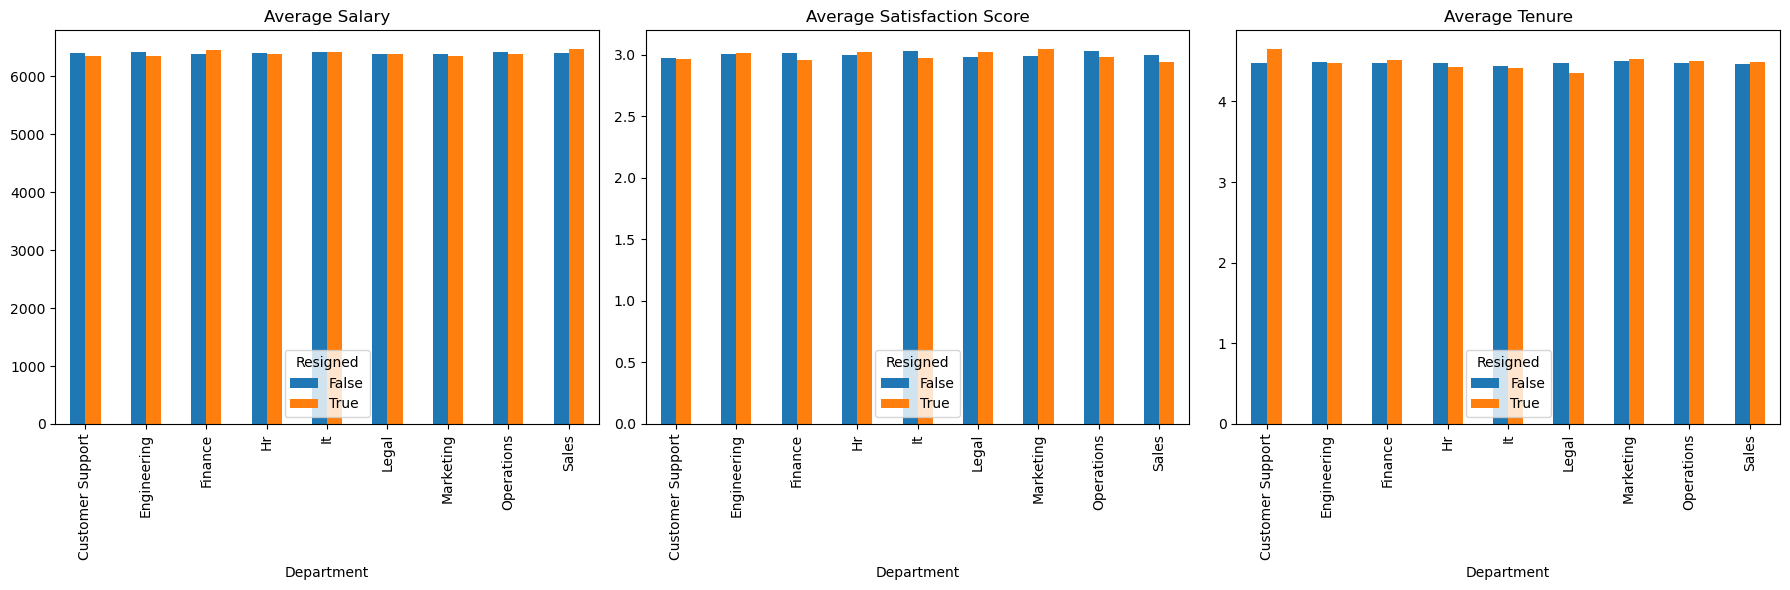

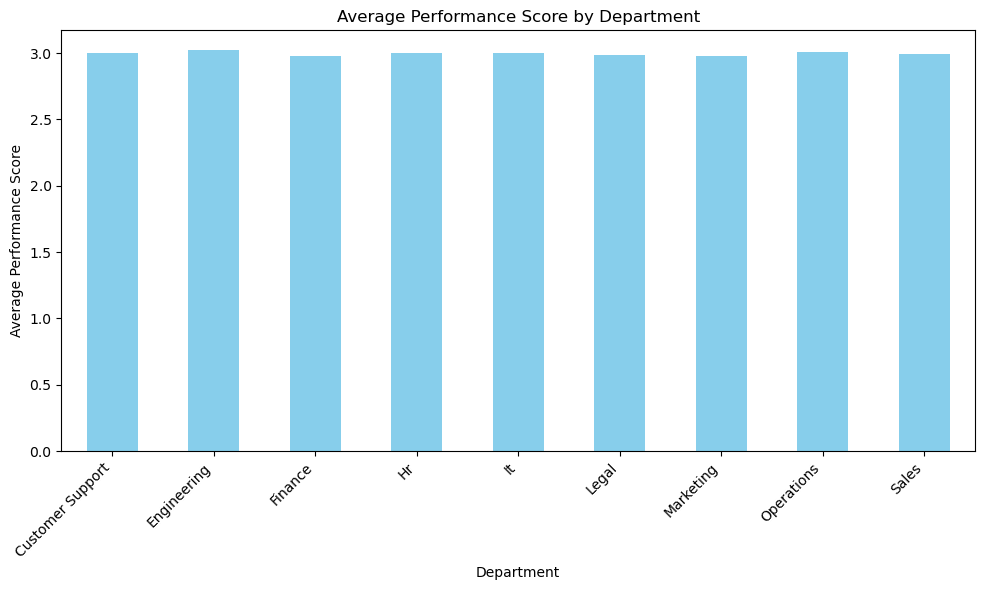

In [151]:
# Plot average salary, satisfaction, and tenure by department and retention status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
retention_factors['Monthly_Salary'].unstack().plot(kind='bar', ax=axes[0], title="Average Salary")
retention_factors['Employee_Satisfaction_Score'].unstack().plot(kind='bar', ax=axes[1], title="Average Satisfaction Score")
retention_factors['Years_At_Company'].unstack().plot(kind='bar', ax=axes[2], title="Average Tenure")
plt.tight_layout()
plt.show()

# Plot average performance score by department
plt.figure(figsize=(10, 6))
average_performance_by_department.plot(kind='bar', color='skyblue')
plt.title("Average Performance Score by Department")
plt.ylabel("Average Performance Score")
plt.xlabel("Department")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**More visualizations of the data**

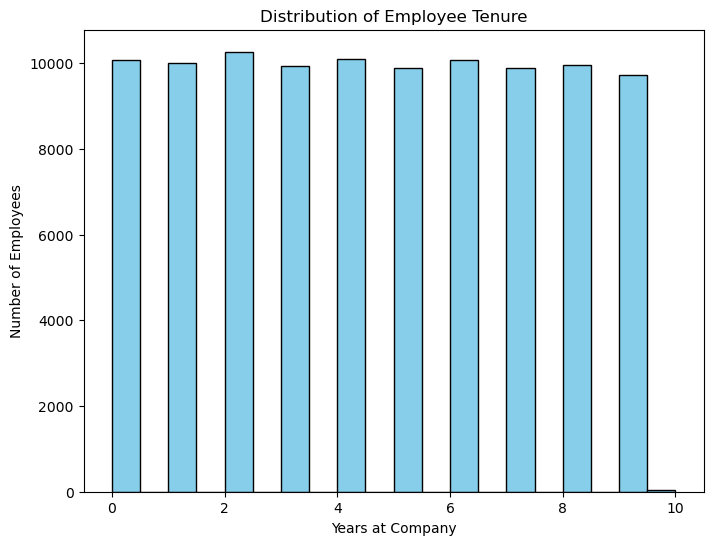

<Figure size 1200x600 with 0 Axes>

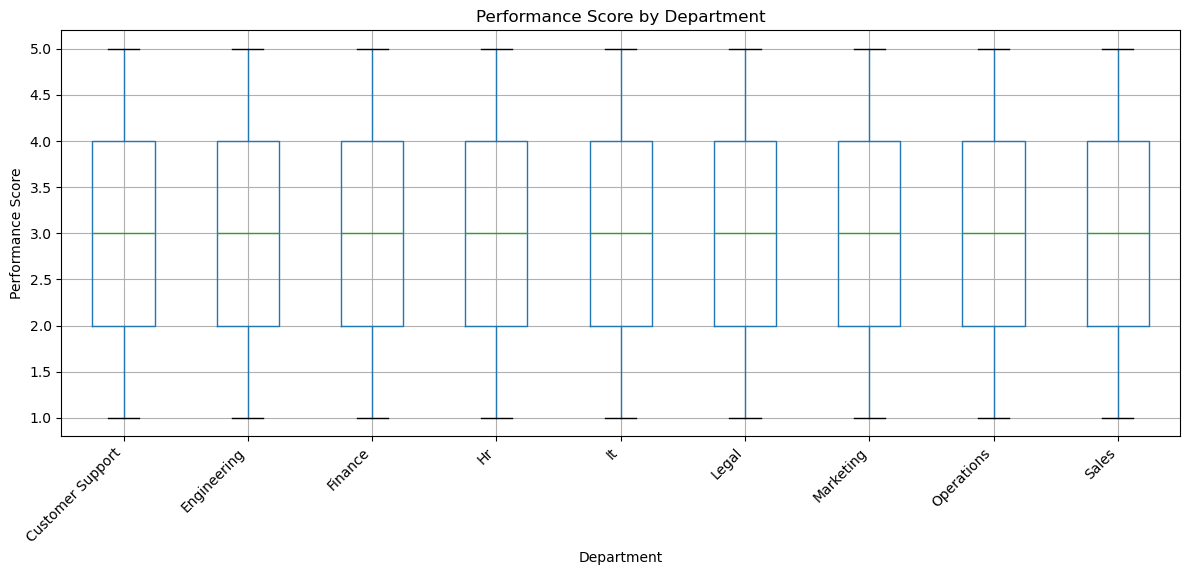

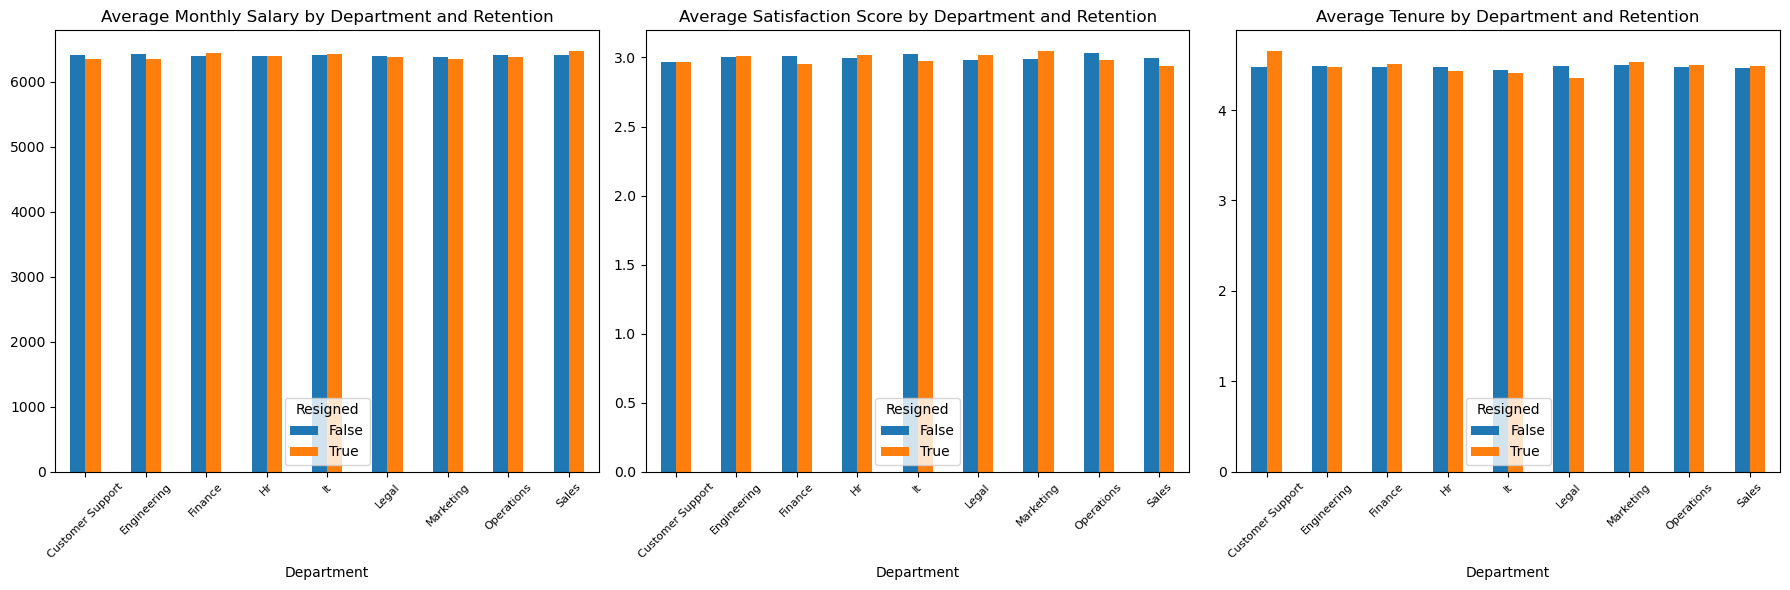

In [152]:
# 1. Histogram of employee tenure
plt.figure(figsize=(8, 6))
plt.hist(employee_df['Years_At_Company'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Employee Tenure')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.show()

# 2. Box plots of performance scores by department
plt.figure(figsize=(12, 6))
employee_df.boxplot(column='Performance_Score', by='Department', figsize=(12, 6))
plt.title('Performance Score by Department')
plt.suptitle('')  # Remove default suptitle
plt.ylabel('Performance Score')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Bar charts for average monthly salary, satisfaction, and tenure by department and retention
retention_factors = employee_df.groupby(['Department', 'Resigned'])[['Monthly_Salary', 'Employee_Satisfaction_Score', 'Years_At_Company']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
retention_factors['Monthly_Salary'].unstack().plot(kind='bar', ax=axes[0], title='Average Monthly Salary by Department and Retention')
retention_factors['Employee_Satisfaction_Score'].unstack().plot(kind='bar', ax=axes[1], title='Average Satisfaction Score by Department and Retention')
retention_factors['Years_At_Company'].unstack().plot(kind='bar', ax=axes[2], title='Average Tenure by Department and Retention')

for ax in axes:
    ax.set_xlabel("Department")
    ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

## Data Transformation

In [153]:
#dropping employee id and Hire date as it is not relevant to the data predictions
data = employee_df.drop(['Employee_ID', 'Hire_Date'], axis=1)

#Dropping duplicates
data = data.drop_duplicates()
print('Size of dataset after data cleaning ', data.shape)

# unique values in department
print('Unique values in Department ', data['Department'].unique())

# unique values in Gender
print('Unique values in Gender ', data['Gender'].unique())

# Unique values in Job Title
print('Unique values in Job Title ', data['Job_Title'].unique())

# unique values in education level
print('Unique values in Education Level', data['Education_Level'].unique())

# Ordinal encoder for Education_Level
encoder = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'Phd']])
data['Education_Level'] = encoder.fit_transform(data[['Education_Level']])

# lable encoding the target column
le = LabelEncoder()
data['Resigned'] = le.fit_transform(data['Resigned'])

# One Hot encoding columns like Department, Gender, Job_Title since there is no hierarchy in values here
data = pd.get_dummies(data)
    
data.head()

Size of dataset after data cleaning  (100000, 18)
Unique values in Department  ['It' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'Hr'
 'Operations' 'Sales' 'Legal']
Unique values in Gender  ['Male' 'Female' 'Other']
Unique values in Job Title  ['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
Unique values in Education Level ['High School' 'Bachelor' 'Master' 'Phd']


,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,...,Gender_Female,Gender_Male,Gender_Other,Job_Title_Analyst,Job_Title_Consultant,Job_Title_Developer,Job_Title_Engineer,Job_Title_Manager,Job_Title_Specialist,Job_Title_Technician
0,55,2,0.0,5,6750.0,33,32,22,2,0,...,False,True,False,False,False,False,False,False,True,False
1,29,0,0.0,5,7500.0,34,34,13,14,100,...,False,True,False,False,False,True,False,False,False,False
2,55,8,0.0,3,5850.0,37,27,6,3,50,...,False,True,False,False,False,False,False,False,True,False
3,48,7,1.0,2,4800.0,52,10,28,12,100,...,True,False,False,True,False,False,False,False,False,False
4,36,3,1.0,2,4800.0,38,11,29,13,100,...,True,False,False,True,False,False,False,False,False,False


## **Goal 1 : What factors influence an employee's decision to resign**

**Data Preparation**

Resignation is the dependent variable.

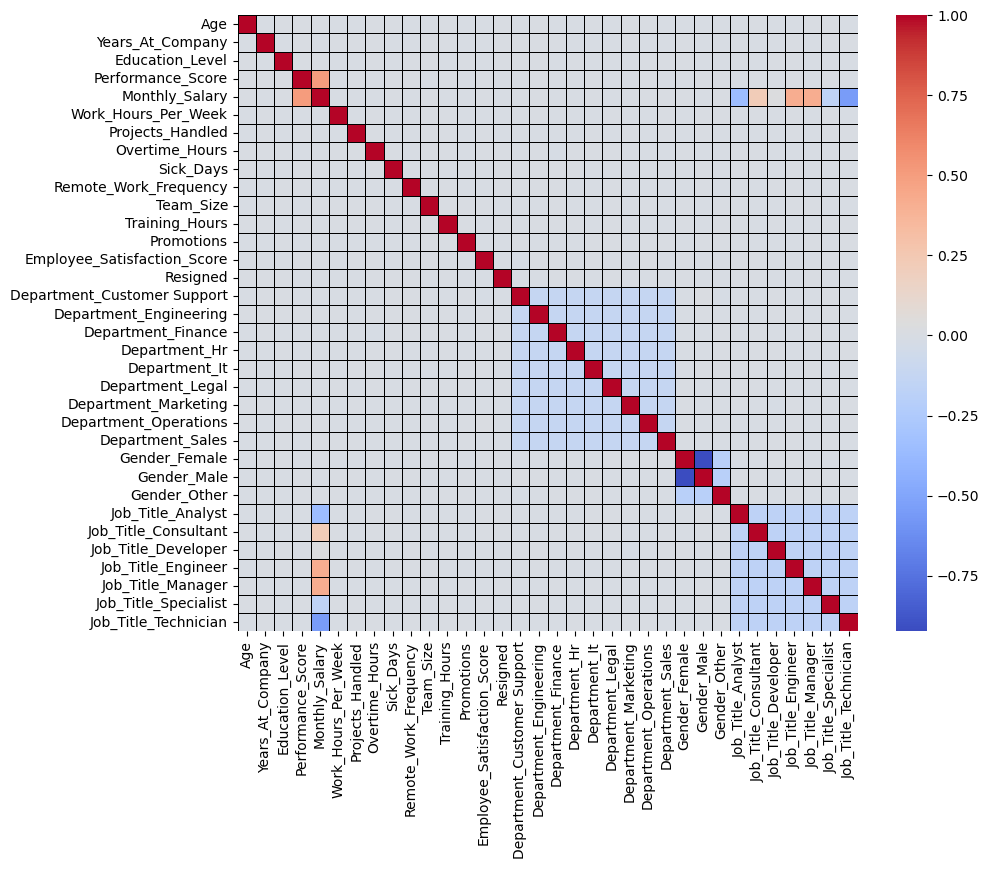

In [155]:
# # Building the X and y data
X = data.drop('Resigned', axis=1)
y = data['Resigned']

# Visualizing correlation of different parameters
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

**Building the training and test dataset**
<br/>

In [156]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Data analytics using classification techniques**

First building some baseline numbers using dummy and decision tree classifier with default parameters

In [157]:
# Baseline model using dummy classifier

dummy_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('dummy_cls', DummyClassifier())
])

dummy_pipe.fit(X_train, y_train)
dummy_test_preds = dummy_pipe.predict(X_test)
dummy_accuracy_score = accuracy_score(y_test, dummy_test_preds)

dummy_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('dummy_cls', DummyClassifier())])

In [158]:
print('Dummy classification accuracy score ', dummy_accuracy_score)


Dummy classification accuracy score  0.90048


In [159]:
# Decision Tree model with default parameters
tree_pipe = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=42))
])

tree_pipe.fit(X_train, y_train)
tree_test_preds = tree_pipe.predict(X_test)
tree_accuracy_score = accuracy_score(y_test, tree_test_preds)

tree_pipe

Pipeline(steps=[('tree', DecisionTreeClassifier(random_state=42))])

In [160]:
print('Decision tree with default params accuracy score ', tree_accuracy_score)

Decision tree with default params accuracy score  0.79852


**Try different classification models**

Using GridSearch to try out various hyperparameters for each model

In [161]:
grid_models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000, random_state=42), {'logisticregression__C': [0.1, 1, 10]}),
    'randomforest': (RandomForestClassifier(random_state=42), {'randomforest__n_estimators':[10, 20], 'randomforest__max_depth':[5, 10, 20]}),
    'decisiontreeclassifier': (DecisionTreeClassifier(random_state=42), {'decisiontreeclassifier__criterion' : ['gini', 'entropy'], 'decisiontreeclassifier__max_depth' : [5, 10, 20]})
}

In [162]:
grid_results = []
best_params = []
best_pipelines = {}
for name, (model, params) in grid_models.items() :
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
    grid = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs=1)
    # Fit the model and measure the time
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()
    train_time = (end_time - start_time)/len(grid.cv_results_['mean_fit_time'])
    
    # Get the scores
    best_est = grid.best_estimator_
    best_pipelines[name] = best_est
    train_score = best_est.score(X_train, y_train)
    test_score = best_est.score(X_test, y_test)
    # Build the results array
    grid_results.append([name, train_time, train_score, test_score])
    best_params.append(grid.best_params_)

# Build the dataframe from results array
grid_data = pd.DataFrame(grid_results, columns=['Model', 'Train Time', 'Train Score', 'Test Score'])
grid_data.set_index('Model', inplace=True)

print(grid_data)

                        Train Time  Train Score  Test Score
Model                                                      
knn                       3.709018     0.900187     0.89800
logisticregression        0.381624     0.899707     0.90048
randomforest              2.714837     0.899707     0.90048
decisiontreeclassifier    1.452035     0.899773     0.90044


In [163]:
# Print the best hyperparameters chosen in grid search for each model
for best_param in best_params:
    print(best_param)

{'knn__n_neighbors': 7}
{'logisticregression__C': 0.1}
{'randomforest__max_depth': 5, 'randomforest__n_estimators': 10}
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5}


Text(0.5, 0.98, 'Models with Grid Parameters')

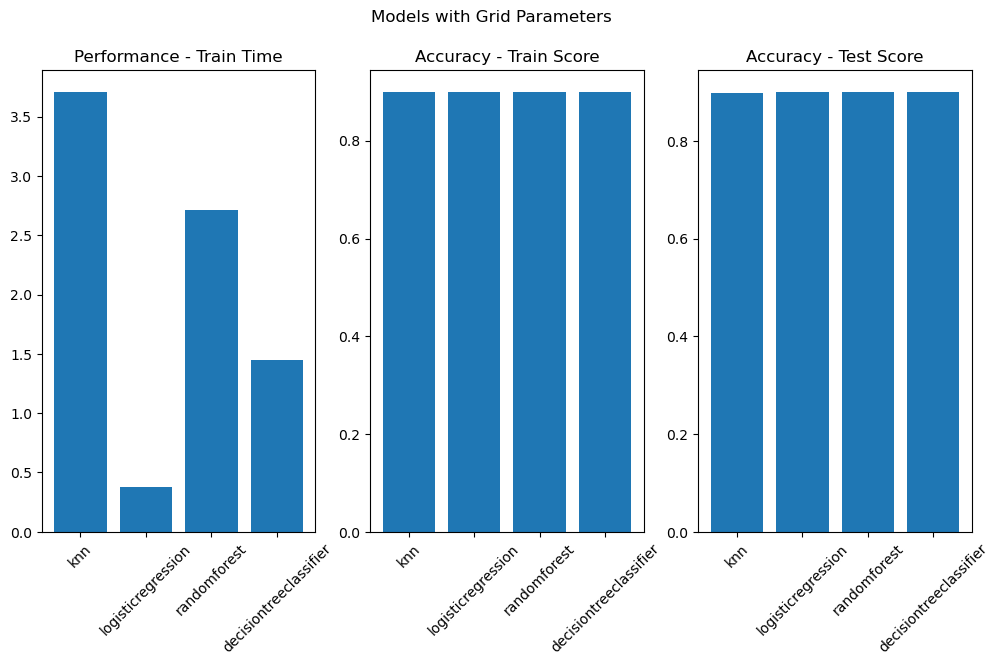

In [164]:
#plot the data for grid parameters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
ax1.bar(grid_data.index, grid_data['Train Time'])
ax1.tick_params(axis='x', rotation=45)
ax2.bar(grid_data.index, grid_data['Train Score'])
ax2.tick_params(axis='x', rotation=45)
ax3.bar(grid_data.index, grid_data['Test Score'])
ax3.tick_params(axis='x', rotation=45)
ax1.title.set_text('Performance - Train Time')
ax2.title.set_text('Accuracy - Train Score')
ax3.title.set_text('Accuracy - Test Score')
fig.suptitle('Models with Grid Parameters')

**Summary of different models**

RandomForest classification had the best accuracy score.
Picking random forest classification as the desired model due to high accuracy score

**Model evaluation**

Re-fitting the randomforest model using the parameters from GridSeachCV


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     22512
           1       0.00      0.00      0.00      2488

    accuracy                           0.90     25000
   macro avg       0.45      0.50      0.47     25000
weighted avg       0.81      0.90      0.85     25000

accuracy: 0.90048


Text(0.5, 1.0, 'RandomForest Confusion Matrix')

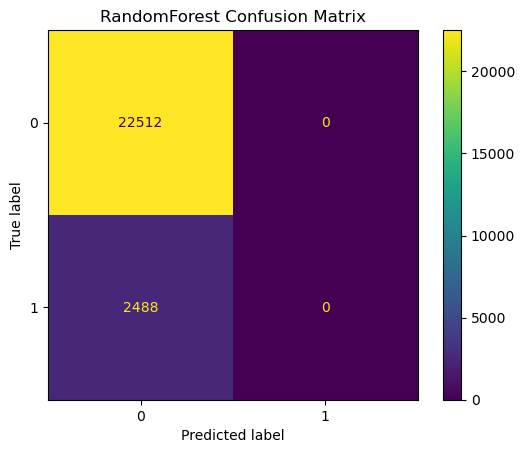

In [174]:
# Model Statistics
y_pred = best_pipelines['randomforest'].predict(X_test)
print(classification_report(y_test, y_pred))
print("accuracy: {:0.5f}".format(accuracy_score(y_test, y_pred)))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.title("RandomForest Confusion Matrix")

In [175]:
# Feature importance using permutation for Random forest
importances_rf = best_pipelines['randomforest'].named_steps['randomforest'].feature_importances_
print(len(importances_rf))
perm_importances_rf = pd.DataFrame({'feature': X_test.columns, 'importance': importances_rf})
perm_importances_rf = perm_importances_rf.sort_values(by='importance', ascending=False)
print("\nPermutation Importance from Random Forest:")
print(perm_importances_rf)

33

Permutation Importance from Random Forest:
                        feature  importance
11               Training_Hours    0.143240
0                           Age    0.113883
13  Employee_Satisfaction_Score    0.097532
6              Projects_Handled    0.081799
8                     Sick_Days    0.070535
7                Overtime_Hours    0.069708
5           Work_Hours_Per_Week    0.056356
1              Years_At_Company    0.051762
10                    Team_Size    0.048337
4                Monthly_Salary    0.029098
3             Performance_Score    0.027983
2               Education_Level    0.021724
17                Department_Hr    0.021092
28          Job_Title_Developer    0.021072
9         Remote_Work_Frequency    0.019011
18                Department_It    0.014235
12                   Promotions    0.013693
20         Department_Marketing    0.011352
30            Job_Title_Manager    0.009747
14  Department_Customer Support    0.009122
27         Job_Title_Consulta

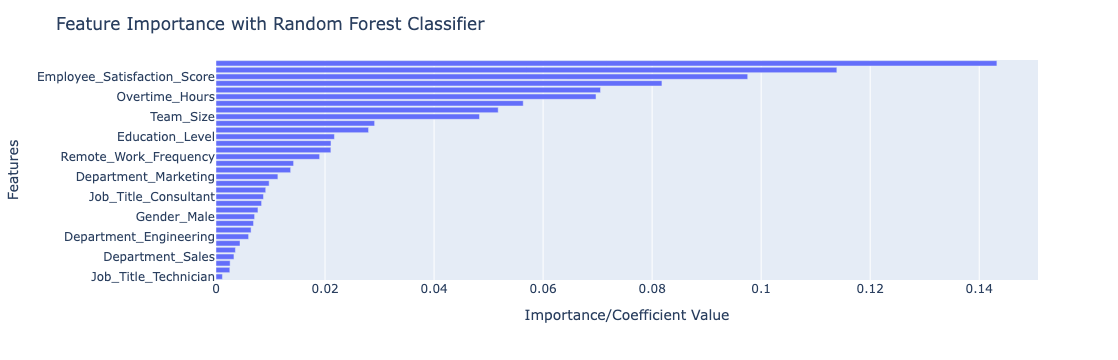

In [176]:
# Plotting the feature importances and coefficients

fig = px.bar(perm_importances_rf, x='importance', y='feature', orientation='h')

# Update layout to sort bars in descending order
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    title = "Feature Importance with Random Forest Classifier",
    xaxis_title = "Importance/Coefficient Value",
    yaxis_title = "Features"
)
fig.show()

# Analysis of Employee Attrition Factors and Recommendations  

## Key Findings  
Based on the analysis presented in the accompanying charts, the application of the random forest classification model on the employee dataset has identified the following key factors as the most significant contributors to an employee's decision to resign:  

- **Employee Satisfaction Score**  
- **Overtime Hours**  
- **Team Size**  
- **Education Level**  
- **Remote Work Frequency**  

## Recommendations  
To effectively manage and reduce employee attrition, organizational decision-makers should take the following actions:  

1. **Monitor Employee Satisfaction Scores** – Regular employee surveys should be conducted and analyzed to identify dissatisfaction trends and implement targeted retention strategies.  
2. **Manage Overtime Hours** – Excessive overtime can lead to burnout and increased turnover. Workload distribution should be reviewed to ensure a sustainable balance.  
3. **Optimize Team Sizes** – The impact of team size on employee retention should be assessed, ensuring that workloads and collaboration dynamics remain manageable.  
4. **Evaluate Remote Work Policies** – The frequency of remote work can influence employee retention. Organizations should consider flexible work arrangements based on employee preferences and productivity data.  
5. **Leverage Data-Driven Monitoring** – The predictive modeling techniques demonstrated in this report should be utilized to identify employees at higher risk of attrition. Proactive engagement strategies should be implemented for these employees to improve retention.  

By systematically addressing these factors, organizations can enhance employee satisfaction, reduce turnover, and improve overall workforce stability.  


<br>
<br>
<br>
<br>

## **Goal 2 - calculate ideal monthly salary for employees**

To calculate monthly salary, we will use regression techniques. Considering the following factors in salary determination
- Performance Score
- Job Title,
- Years at Company
- Projects Handled
- Work Hours Per Week

In [177]:
salary_data = employee_df[['Performance_Score', 'Job_Title', 'Years_At_Company', 'Work_Hours_Per_Week', 'Projects_Handled', 'Monthly_Salary']]
# le = LabelEncoder()
# salary_data['Job_Title'] = le.fit_transform(salary_data['Job_Title'])
salary_data = pd.get_dummies(salary_data)

In [178]:
X_salary, y_salary = salary_data.drop('Monthly_Salary', axis=1), salary_data['Monthly_Salary']

In [179]:
# Split the data into training and test data
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(X_salary, y_salary, test_size=0.25, random_state=42)

In [188]:
#sequential selector and linear regression
salary_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
    ('linreg', LinearRegression())
])
salary_pipe.fit(X_train_sal, y_train_sal)
seq_lin_reg_coefs = salary_pipe.named_steps['linreg'].coef_

seq_feature_names = salary_pipe.named_steps['poly_features'].get_feature_names_out()
seq_sel_feature_names = seq_feature_names[salary_pipe.named_steps['selector'].get_support()]

seq_df = pd.DataFrame({'feature': seq_sel_feature_names, 'coef': seq_lin_reg_coefs})

salary_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [181]:
print(seq_df.loc[seq_df['coef'] != 0])

                feature         coef
0     Performance_Score   492.755661
1     Job_Title_Analyst -2599.775305
2  Job_Title_Consultant  -649.380811
3   Job_Title_Developer -1299.774245
4  Job_Title_Specialist -1950.104250
5  Job_Title_Technician -3248.511277


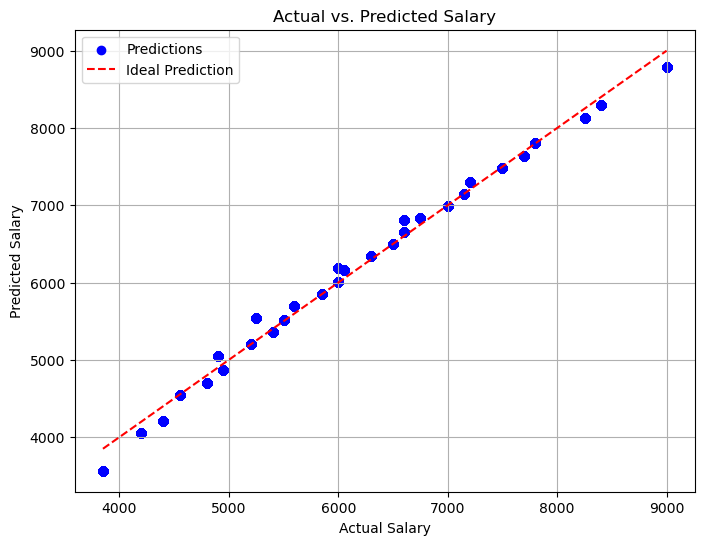

In [187]:
y_pred_sal = salary_pipe.predict(X_test_sal)
# plt.scatter(y_test_sal, y_pred_sal)
# plt.xlabel("Actual Salary")
# plt.ylabel("Predicted Salary")
# plt.title("Actual vs. Predicted Monthly Salary")
# plt.show()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
plt.scatter(y_test_sal, y_pred_sal, color='blue', label='Predictions')
plt.plot([min(y_test_sal), max(y_test_sal)], [min(y_test_sal), max(y_test_sal)], linestyle='--', color='red', label='Ideal Prediction') # Line for perfect predictions
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

In [184]:
print("RMSE ", mean_squared_error(y_test_sal, y_pred_sal, squared=False))

RMSE  127.57371437097477


# Analysis of Salary Determination Factors and Recommendations  

## Key Findings  
Based on the data modeling conducted, the primary factors influencing an employee’s ideal salary are:  

- **Performance Score**  
- **Job Title**  

A linear regression model was applied to predict salary levels, achieving a root mean squared error (RMSE) of **127**, indicating a reasonable level of accuracy in salary estimation.  

## Recommendations  
To ensure fair and competitive compensation, the following actions are recommended for management and HR:  

1. **Utilize Data-Driven Salary Benchmarking** – By leveraging similar data analysis techniques, organizations can identify employees whose salaries fall below the predicted range.  
2. **Implement Compensation Adjustments** – Salary revisions should be made where discrepancies exist to ensure fair and just compensation.  
3. **Enhance Employee Motivation and Retention** – Setting the right salary helps employees feel valued and motivated, leading to improved overall productivity.  
4. **Continuous Salary Evaluation** – Regular reviews of salary structures should be conducted to align with market trends and internal performance metrics.  

By adopting a data-driven approach to compensation, organizations can foster a more equitable workplace, enhance employee satisfaction, and drive long-term productivity.  



<br>
<br>
<br>
<br>

# Summary Report: Employee Attrition and Salary Determination Analysis  

## Overview  
In this exercise, we had 2 goals:
- Determine factors affecting employees decision to resign
- Determine ideal salary for all employees
This report presents key findings from data analysis on employee attrition factors and salary determination. By leveraging predictive modeling, organizations can enhance employee retention, ensure fair compensation, and improve overall workforce productivity.  

## Key Findings
A curated dataset was used to model various machine learning techniques. The dataset was cleaned, refined and then analyzed to determine the most important factors in employee attrition and salary determination analysis.

### Employee Attrition Factors  
Analysis using a random forest classification model identified the following critical factors influencing employee resignation:  

- **Employee Satisfaction Score**  
- **Overtime Hours**  
- **Team Size**  
- **Education Level**  
- **Remote Work Frequency**  

### Salary Determination Factors  
A linear regression model was applied to analyze salary determinants, identifying:  

- **Performance Score**  
- **Job Title**  

The model predicted salary with a root mean squared error (RMSE) of **127**, ensuring a data-driven approach to fair compensation.  

## Recommendations  

### Reducing Employee Attrition  
To enhance employee retention, management should:  

1. **Monitor Employee Satisfaction Scores** – Conduct regular surveys and implement targeted retention strategies.  
2. **Manage Overtime Hours** – Distribute workloads effectively to prevent burnout.  
3. **Optimize Team Sizes** – Ensure team structures support productivity and employee well-being.  
4. **Evaluate Remote Work Policies** – Implement flexible work arrangements based on employee needs.  
5. **Use Predictive Modeling** – Identify at-risk employees and proactively address retention issues.  

### Ensuring Fair Compensation  
To maintain a competitive and equitable salary structure, HR should:  

1. **Use Data-Driven Salary Benchmarking** – Identify employees earning below the predicted range.  
2. **Adjust Compensation Accordingly** – Ensure fair and just rewards for all employees.  
3. **Enhance Employee Motivation** – Fair salaries improve morale, retention, and productivity.  
4. **Regularly Review Salary Structures** – Align compensation with market trends and performance metrics.  

## Conclusion  
By leveraging data-driven insights, organizations can reduce employee attrition, ensure fair compensation, and foster a motivated, productive workforce. Implementing these strategies will lead to long-term business success and employee satisfaction.  
